In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 
plt.style.use('seaborn')

In [3]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)


(500, 2)
(500, 2)


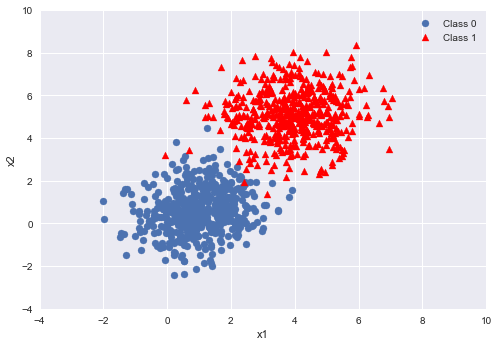

In [11]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [12]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [22]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [24]:
np.random.shuffle(data)
print(data[:10])

[[ 3.82939211  4.59410714  1.        ]
 [ 3.69575929  3.89095075  1.        ]
 [ 3.20306064  3.95703132  1.        ]
 [ 1.81863438  0.45250923  0.        ]
 [ 2.51662445  4.45293203  1.        ]
 [ 1.25995979  4.48750632  0.        ]
 [ 2.38096032  5.08379402  1.        ]
 [ 2.98358265  5.13832351  1.        ]
 [ 1.77560511  0.08373293  0.        ]
 [ 0.65841585 -0.09871217  0.        ]]


In [25]:
split = int(0.8*data.shape[0])

In [26]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


# Trying with the given data

In [32]:
df_x_train = pd.read_csv('Training Data/Logistic_X_Train.csv')
df_y_train = pd.read_csv('Training Data/Logistic_Y_Train.csv')
# print(df_x.shape)
# print(df_y.shape)

In [34]:
X_new_train = df_x_train.to_numpy()
Y_new_train = df_y_train.to_numpy()

In [35]:
X_new_train

array([[-1.23937466,  0.74910149, -0.52851491],
       [-1.03607028,  0.80143631, -1.28371152],
       [-0.61557914,  1.57952053, -1.39192706],
       ...,
       [ 0.08827657,  1.63878904, -2.19364056],
       [ 1.52515501,  0.85923429,  1.50530791],
       [-0.97981744,  0.56395376, -1.53939416]])

In [37]:
Y_new_train.shape

(3000, 1)

In [54]:
Y_new_train = Y_new_train.reshape(-1,)

In [55]:
Y_new_train.shape

(3000,)

In [56]:
Y_new_train

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [44]:
X_new_train.shape

(3000, 3)

In [45]:
df_x_test = pd.read_csv('Testing Data/Logistic_X_Test.csv')

In [46]:
X_new_test = df_x_test.to_numpy()

In [47]:
X_new_test

array([[-0.76750773, -0.2618595 , -2.51483147],
       [-1.24165258,  1.44900144, -0.4130893 ],
       [ 1.92527007,  1.93176097,  1.34261917],
       ...,
       [-1.18696873,  0.94734729, -0.78638597],
       [-0.53232395,  1.84516978, -0.9935503 ],
       [ 0.54023217,  0.58099406,  0.38664901]])

In [48]:
X_new_test.shape

(1000, 3)

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [50]:
lr.fit(df_x_train,df_y_train)

C:\Users\Anirban\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirban\Miniconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
output = lr.predict(df_x_test)

In [53]:
output.shape

(1000,)

In [57]:
Y_new_test = output

In [61]:
print(X_new_train.shape,X_new_test.shape)
print(Y_new_train.shape,Y_new_test.shape)

(3000, 3) (1000, 3)
(3000,) (1000,)


# Logistic Regression Function

In [62]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    hx = np.dot(x,w)+b
    return sigmoid(hx)

In [63]:
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [64]:
def error(y,x,w,b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m

In [65]:
def get_grad(x,w,b,y):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_w += (y[i] - hx)*x[i]
        grad_b +=  (y[i]-hx)
    
    grad_w /=m
    grad_b /=m
    return [grad_w,grad_b]

In [66]:
def gradient_descent(x,y,w,b,learning_rate=0.01):
    err = error(y,x,w,b)
    [grad_w,grad_b] = get_grad(x,w,b,y)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err,w,b

In [67]:
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [68]:
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

# For custom Data

In [80]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [81]:
for i in range(1000):
    l,W,b = gradient_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

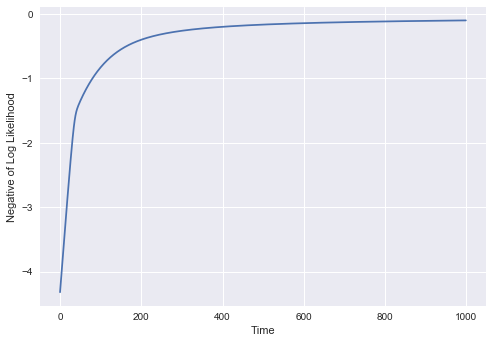

In [82]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

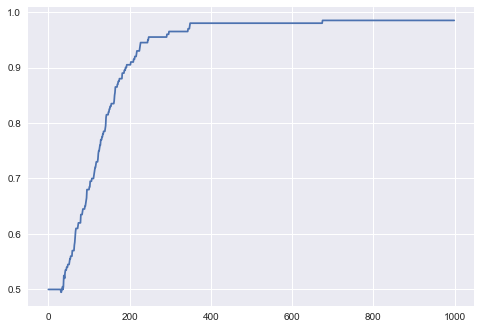

0.985


In [83]:
plt.plot(acc)
plt.show()
print(acc[-1])

# For input Data

In [76]:
loss1 = []
acc1 = []

W = 2*np.random.random((X_new_train.shape[1],))
b = 5*np.random.random()

In [77]:
for i in range(1000):
    l,W,b = gradient_descent(X_new_train,Y_new_train,W,b,learning_rate=0.1)
    acc1.append(get_acc(X_new_test,Y_new_test,W,b))
    loss1.append(l)

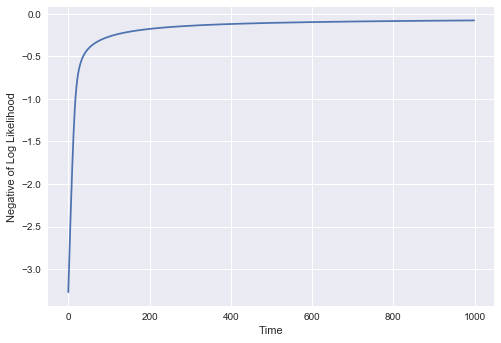

In [78]:
plt.plot(loss1)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

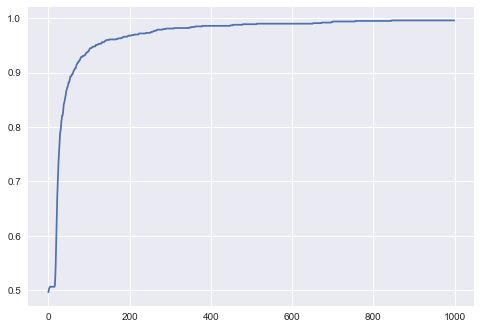

0.996


In [79]:
plt.plot(acc1)
plt.show()
print(acc1[-1])

# Plotting a Hyperplane or a decision boundary for custom Data

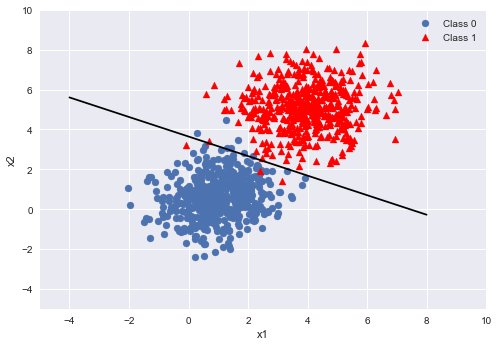

In [84]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()